## Data Wrangling Step

This step involves the cleaning, and formatting of data for the purpose of
1. Data Analysis.
2. Machine Learning Modelling.
3. Development of actionable insights.



Data Should be downloaded and stored on the local machine or can be downloaded straight from the UCI repository depending on the preference.


In [2]:
BASE_FOLDER = "/content/drive/MyDrive/Colab_Notebooks/online_retail/"

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go


In [4]:
# Import Retail data
retail_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/online_retail/online_retail_II.csv")

In [ ]:
retail_data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [5]:
# To explore the data and give a descriptive statistics of the data
retail_data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


From the above descriptive statistics it can be observed that certain values are abnormal

1. For instance the Quantity and Price both have negative values.

2. The CustomerID does not uniquely represent all the transactions that were carried out.

There are also other issues to be addressed.

3. Some descriptions are missing, this would also need to be sorted out as this will be useful for the analysis of the data.

# Data Cleaning tasks

In [6]:
retail_data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [ ]:
print("Percentage of customers missing: ", round(retail_data['Customer ID'].isnull().sum() * 100 / len(retail_data),2),"%" )

Percentage of customers missing:  22.77 %


From the look of things its the description and the customer ID that possess the missing data. This rows with this missing data makes up 22.77% of the data. It therefore important to devise a means to fill in this missing data intelligently.

The average amount of orders made can be calculated using the invoice numbers and the total number of orders

In [7]:
print("Number of orders in df1:", retail_data['Invoice'].nunique())
print("Avg. number of products per order in the dataset: ", round(retail_data['StockCode'].count() / retail_data['Invoice'].nunique(),2) )

Number of orders in df1: 53628
Avg. number of products per order in the dataset:  19.9


In the step to design or develop new customer IDs. This would ensure all customers can be uniquely identified.

In [8]:
retail_data["Null_CustomerID"] = [1 if i==True else 0 for i in retail_data["Customer ID"].isnull()]

It is safe to assume that creating new customer IDs will not affect the insights we hope to gain from the data. Reason being that the invoice number can be used to identify all unique orders, which is our purpose of analysis for now.

New customer IDs can be assigned by using the invoice orders, however this would mean that customers for which their customer IDs were not captured are automatically seen as new and unique customers.

In [9]:
retail_data["New_ID"] = retail_data["Customer ID"]
retail_data.loc[retail_data["Null_CustomerID"] == 1, ["New_ID"]] = retail_data["Invoice"]

In [10]:
retail_data[retail_data["Null_CustomerID"] == 1].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Null_CustomerID,New_ID
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom,1,489464
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom,1,489463
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom,1,489467
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom,1,489521
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom,1,489525


In [ ]:
retail_data[retail_data["Null_CustomerID"] == 0].head() 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Null_CustomerID,New_ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,13085
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,13085
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,13085
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,13085
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,13085


In [ ]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Invoice          1067371 non-null  object 
 1   StockCode        1067371 non-null  object 
 2   Description      1062989 non-null  object 
 3   Quantity         1067371 non-null  int64  
 4   InvoiceDate      1067371 non-null  object 
 5   Price            1067371 non-null  float64
 6   Customer ID      824364 non-null   float64
 7   Country          1067371 non-null  object 
 8   Null_CustomerID  1067371 non-null  int64  
 9   New_ID           1067371 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 81.4+ MB


In [ ]:
#drop Customer ID column since it isn't need anymore
retail_data = retail_data.drop('Customer ID', 1)
retail_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,Null_CustomerID,New_ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,0,13085
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,0,13085
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,0,13085
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,0,13085
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,0,13085


In [ ]:
retail_data[retail_data["Invoice"].str.startswith("C")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,Null_CustomerID,New_ID
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,Australia,0,16321
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,Australia,0,16321
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,Australia,0,16321
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,Australia,0,16321
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,Australia,0,16321
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,United Kingdom,0,14397
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,United Kingdom,0,15498
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,United Kingdom,0,15311
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,United Kingdom,0,17315


In [ ]:
retail_data[retail_data["Description"] == "PAPER BUNTING WHITE LACE"]["Invoice"].str.startswith('C')

178         True
187        False
5869       False
6064       False
6497       False
           ...  
1021522    False
1064639    False
1065636    False
1065850    False
1067030    False
Name: Invoice, Length: 900, dtype: bool

In [ ]:
retail_data[retail_data["Invoice"].str.startswith("C")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,Null_CustomerID,New_ID
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,Australia,0,16321
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,Australia,0,16321
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,Australia,0,16321
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,Australia,0,16321
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,Australia,0,16321
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,United Kingdom,0,14397
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,United Kingdom,0,15498
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,United Kingdom,0,15311
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,United Kingdom,0,17315


To ensure consistency the data types of the new ID is meant to be numeric, since cancelled orders were inclusive in the invoice column some of the rows must have affected the data type of the New ID, 


In [ ]:
#Remove all non digits from column NewID
retail_data['New_ID'] = retail_data['New_ID'].astype(str).str.replace('\D+', '')

#Convert to integer
retail_data['New_ID'] = pd.to_numeric(retail_data['New_ID'])

#Check if the 'C' character was removed in the NewID column
retail_data[retail_data['New_ID']== 580605]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,Null_CustomerID,New_ID
1050063,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,United Kingdom,1,580605


In [ ]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Invoice          1067371 non-null  object 
 1   StockCode        1067371 non-null  object 
 2   Description      1062989 non-null  object 
 3   Quantity         1067371 non-null  int64  
 4   InvoiceDate      1067371 non-null  object 
 5   Price            1067371 non-null  float64
 6   Country          1067371 non-null  object 
 7   Null_CustomerID  1067371 non-null  int64  
 8   New_ID           1067371 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 73.3+ MB


In [ ]:
print(retail_data["New_ID"].nunique())

14694


In [ ]:
print(retail_data["StockCode"].nunique())

5305


In [ ]:
# STORE RETAIL DATA
retail_data.to_csv(f"{BASE_FOLDER}cleaned_retail_data.csv")

In [ ]:
# Customers with Different Countries
Customers = retail_data.groupby('New_ID')['Country'].unique()
Customers.loc[Customers.apply(lambda x:len(x)>1)]

New_ID
123700           [Austria, Cyprus]
123940          [Belgium, Denmark]
124130             [Spain, France]
124170            [Belgium, Spain]
124220    [Australia, Switzerland]
124230          [Denmark, Belgium]
124290          [Denmark, Austria]
124310        [Belgium, Australia]
124490          [Denmark, Belgium]
124550             [Cyprus, Spain]
124570       [Switzerland, Cyprus]
126520           [Germany, France]
127450      [EIRE, United Kingdom]
Name: Country, dtype: object

## Further cleaning

In [ ]:
retail_data.describe()

,Quantity,Price,Null_CustomerID,New_ID
count,1.067371e+06,1.067371e+06,1.067371e+06,1.067371e+06
mean,9.938898e+00,4.649388e+00,2.276687e-01,2.409006e+05
std,1.727058e+02,1.235531e+02,4.193278e-01,1.626296e+05
min,-8.099500e+04,-5.359436e+04,0.000000e+00,1.234600e+05
25%,1.000000e+00,1.250000e+00,0.000000e+00,1.437000e+05
50%,3.000000e+00,2.100000e+00,0.000000e+00,1.617000e+05
75%,1.000000e+01,4.150000e+00,0.000000e+00,1.806400e+05
max,8.099500e+04,3.897000e+04,1.000000e+00,5.814980e+05


Now that the issues of IDs have been resolved let us delve deeper into the cleaning

# Exploratory Data Analysis

To understand the pattern of sales its important to obtain the top ten products for each of these sales.

In [ ]:
retail_data["StockCode"].value_counts()

85123A    5829
22423     4424
85099B    4216
21212     3318
20725     3259
          ... 
21835        1
71406B       1
35941        1
35977B       1
21019        1
Name: StockCode, Length: 5305, dtype: int64

In [ ]:
retail_data[retail_data["StockCode"] == "85123A"]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,Null_CustomerID,New_ID
102,489442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2009-12-01 09:46:00,2.95,United Kingdom,0,136350
147,489446,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2009-12-01 10:06:00,2.55,United Kingdom,0,137580
271,489465,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2009-12-01 10:52:00,2.55,United Kingdom,0,137670
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,United Kingdom,1,489467
366,489517,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2009-12-01 11:34:00,2.95,United Kingdom,0,163290
...,...,...,...,...,...,...,...,...,...
1064803,581439,85123A,CREAM HANGING HEART T-LIGHT HOLDER,1,2011-12-08 16:30:00,5.79,United Kingdom,1,581439
1065440,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-12-08 18:03:00,2.55,United Kingdom,0,176750
1065678,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-08 19:55:00,2.95,United Kingdom,0,157960
1066298,581492,85123A,CREAM HANGING HEART T-LIGHT HOLDER,3,2011-12-09 10:03:00,5.79,United Kingdom,1,581492


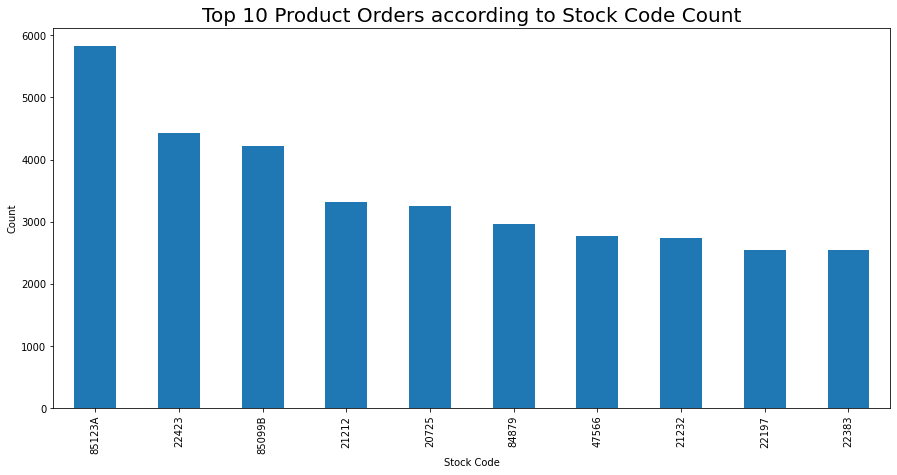

In [ ]:
retail_data["StockCode"].value_counts().head(10).plot.bar(figsize = (15, 7))
plt.title('Top 10 Product Orders according to Stock Code Count', fontsize = 20)
plt.xlabel('Stock Code')
plt.ylabel('Count')
plt.show()

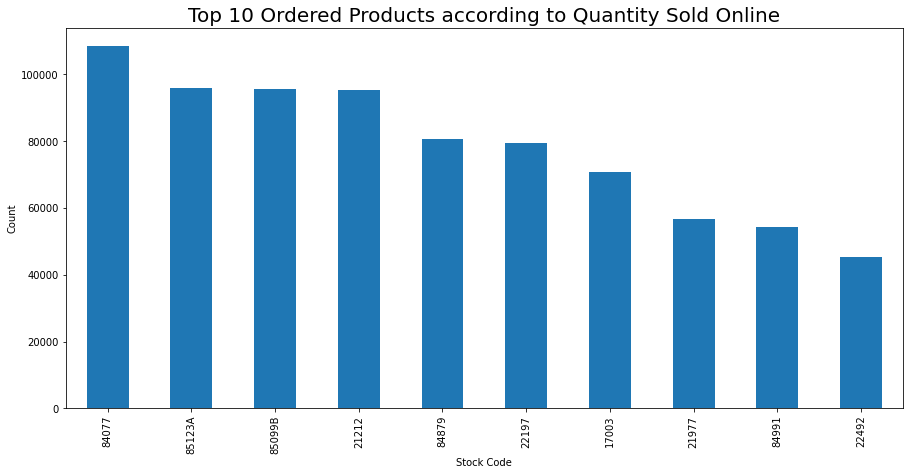

In [ ]:
# Top 10 ordered products
retail_data['Quantity'].groupby(retail_data['StockCode']).agg(
    'sum').sort_values(ascending = False).head(10).plot.bar(figsize = (15, 7))
plt.title('Top 10 Ordered Products according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Stock Code')
plt.ylabel('Count')
plt.show()


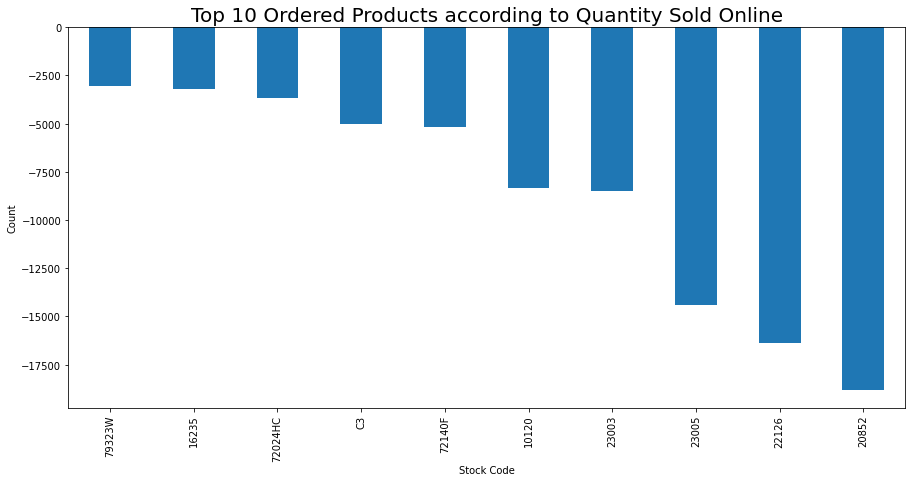

In [ ]:
retail_data['Quantity'].groupby(retail_data['StockCode']).agg(
    'sum').sort_values(ascending = False).tail(10).plot.bar(figsize = (15, 7))
plt.title('Top 10 Ordered Products according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Stock Code')
plt.ylabel('Count')
plt.show()

Where are most of the orders coming from? This gives an idea of how certain holidays might affect the orders.

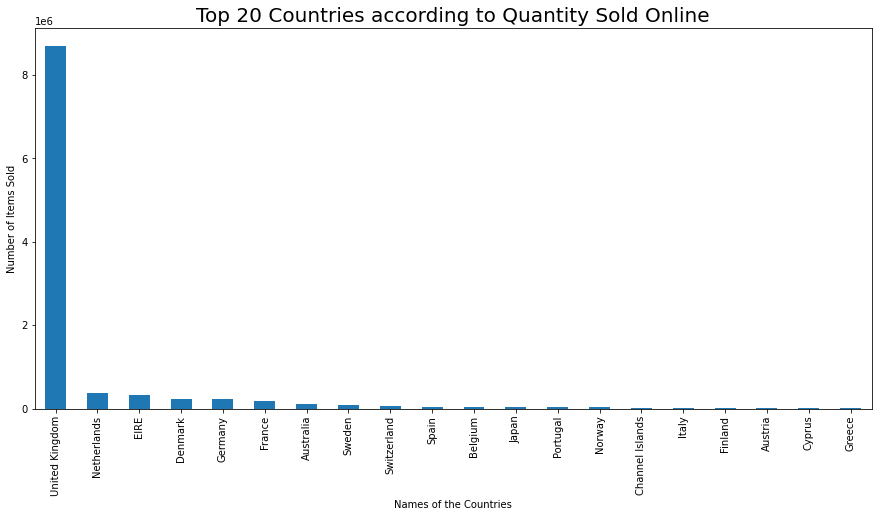

In [ ]:
retail_data['Quantity'].groupby(retail_data['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7))

plt.title('Top 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

## Time Series Analysis for EDA on Sales
After observing basic EDA plots, the data shows the distribution of certain products and the distribution of people buying these goods.

Since the goal is to forecast the weekly aggregated sales for four weeks, there is a need to know if there are patterns that could be patterns in the sales before the 4 weeks.

Here are some of the questions that needs to be answered through data.

## What is the Sales distribution in the past?
With the basic EDA we were able to obtain the top 10 products by quantity let take a look at what the sales of these products looked like in the past, with the aim of 

1. Identifying patterns
2. Identifying trends

OR

We can do this randomly - so that there is no discrimination...

In [ ]:
top_10 = retail_data['Quantity'].groupby(retail_data['StockCode']).agg(
    'sum').sort_values(ascending = False).head(10)

In [ ]:
top_10_list = list(top_10.index)

In [ ]:
# Generate the aggregated weekly sales
dated_retail_data = retail_data.copy()
dated_retail_data["Date"] = pd.to_datetime(retail_data["InvoiceDate"]) - pd.to_timedelta(7, unit="d")
weekly_retail_data = dated_retail_data.groupby(["StockCode", pd.Grouper(key="Date", freq="W-MON")])["Quantity"].sum().reset_index().sort_values('Date')

In [ ]:
for item in top_10_list:
  print(item)

84077
85123A
85099B
21212
84879
22197
17003
21977
84991
22492


In [ ]:
def plot_series(stock_code):
  fig = go.Figure([go.Scatter(x=weekly_retail_data.loc[weekly_retail_data["StockCode"] == stock_code]["Date"], 
                            y=weekly_retail_data.loc[weekly_retail_data["StockCode"] == stock_code]["Quantity"])])
  fig.update_layout(title_text=f"Graph for {stock_code}")
  return fig.show()


In [ ]:
for item in top_10_list:
  plot_series(item)

In [ ]:
weekly_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202456 entries, 0 to 133579
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   StockCode  202456 non-null  object        
 1   Date       202456 non-null  datetime64[ns]
 2   Quantity   202456 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 6.2+ MB


In [ ]:
weekly_retail_data.head()

,StockCode,Date,Quantity
0,10002,2009-11-30,143
12904,20775,2009-11-30,1
193990,90011B,2009-11-30,2
154768,72798C,2009-11-30,1
194003,90011C,2009-11-30,1


In [ ]:
weekly_retail_data.to_csv(f"{BASE_FOLDER}weekly_retail_data.csv")

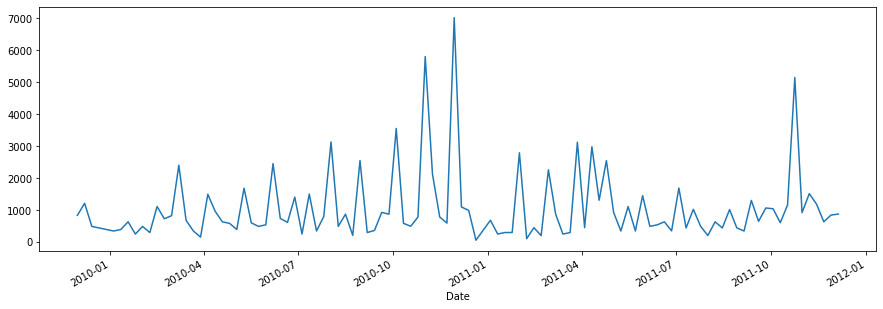

In [ ]:
weekly_retail_data.loc[weekly_retail_data["StockCode"] == "84077"].set_index("Date")["Quantity"].plot(figsize=(15,5))

In [ ]:
# using Ploty
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=weekly_retail_data.loc[weekly_retail_data["StockCode"] == "84077"]["Date"], 
                            y=weekly_retail_data.loc[weekly_retail_data["StockCode"] == "84077"]["Quantity"])])
fig.show()

In [ ]:
# 85123A
# using Ploty

fig = go.Figure([go.Scatter(x=weekly_retail_data.loc[weekly_retail_data["StockCode"] == "85123A"]["Date"], 
                            y=weekly_retail_data.loc[weekly_retail_data["StockCode"] == "85123A"]["Quantity"])])
fig.show()

In [ ]:
# 85123A
# using Ploty
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=weekly_retail_data.loc[weekly_retail_data["StockCode"] == "85099B"]["Date"], 
                            y=weekly_retail_data.loc[weekly_retail_data["StockCode"] == "85099B"]["Quantity"])])
fig.show()

In [ ]:
plot_series("21212")

## From the above plots it looks like they are seasonal - But let us ask further questions - can we notice any patterns when these sales are grouped by countries?

First let's do an analysis of countries with the most sales

In [ ]:
retail_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,New_ID,Null_CustomerID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,130850,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,130850,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,130850,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,130850,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,130850,0


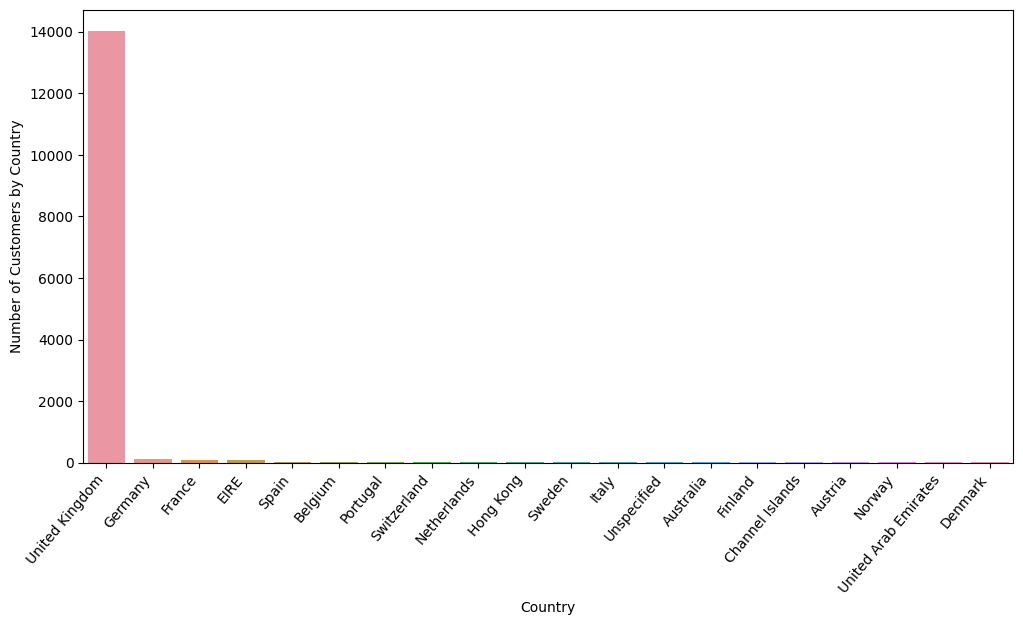

In [ ]:
country_df = pd.DataFrame(retail_data.groupby('Country')['New_ID'].nunique())
country_df.columns = ['Number of Customers by Country']
country_df.sort_values('Number of Customers by Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=country_df.head(20).index, y=country_df.head(20)['Number of Customers by Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

In [ ]:
list_countries = list(country_df.index[0:11])

In [ ]:
def plot_series_country(country):
  fig = go.Figure([go.Scatter(x=weekly_retail_data_country.loc[weekly_retail_data_country["Country"] == country]["Date"], 
                            y=weekly_retail_data_country.loc[weekly_retail_data_country["Country"] == country]["Quantity"])])
  fig.update_layout(title_text=f"Aggregated weekly sales for {country}")
  return fig.show()

In [ ]:
for item in list_countries:
  plot_series_country(item)

In [ ]:
# Generate the aggregated weekly sales
dated_retail_data = retail_data.copy()
dated_retail_data["Date"] = pd.to_datetime(retail_data["InvoiceDate"]) - pd.to_timedelta(7, unit="d")
weekly_retail_data_country = dated_retail_data.groupby(["Country", pd.Grouper(key="Date", freq="W-MON")])["Quantity"].sum().reset_index().sort_values('Date')

In [ ]:
weekly_retail_data_country.head()

,Country,Date,Quantity
0,Australia,2009-11-30,-4
786,Japan,2009-11-30,-191
250,Cyprus,2009-11-30,397
680,Greece,2009-11-30,441
322,EIRE,2009-11-30,1480


In [ ]:
weekly_retail_data_country.tail()

,Country,Date,Quantity
721,Iceland,2011-12-05,192
698,Greece,2011-12-05,236
679,Germany,2011-12-05,3040
471,Finland,2011-12-05,-1
929,Netherlands,2011-12-05,7958


In [ ]:
plot_series_country("Iceland")

In [ ]:
!git clone https://github.com/DrUkachi/time-series-forecasting-with-python.git

Cloning into 'time-series-forecasting-with-python'...
remote: Enumerating objects: 517, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 517 (delta 19), reused 32 (delta 10), pack-reused 457
Receiving objects: 100% (517/517), 50.67 MiB | 31.95 MiB/s, done.
Resolving deltas: 100% (207/207), done.


In [ ]:
!mkdir /content/drive/MyDrive/Colab_Notebooks/7lytix Project/other_repos/

mkdir: cannot create directory ‘Notebooks/7lytix’: No such file or directory
mkdir: cannot create directory ‘Project/other_repos/’: No such file or directory


In [ ]:

!cp -R /content/time-series-forecasting-with-python /content/drive/MyDrive/Colab_Notebooks/online_retail/other_repos/